<a href="https://colab.research.google.com/github/krishnakaushik25/whatsapp-chat-analysis-EDA-/blob/main/whatsapp_chat_analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('blank-starter')
jovian.set_colab_id('1uNeugY7GsZWD5TycFCzNT9N2-Q0ESGqg')

     |████████████████████████████████| 71kB 3.2MB/s 


# Project Whatsapp Message Exploratory Data Analysis(EDA)
Author: Krishna Kaushik

# Out-line
- Introduction.
- Data Retrieval. 
- Data Preparation and Cleaning.
- Business & Data understanding.
- Exploratory Data Analysis(EDA)
- Conclusion.


# Introduction:
Hello there, thanks for review my notebook! We are going to analyse the whatsapp chat  that we normally use everydays. In here we are going to use a chat group that is "University group" and in this group we normally  will exchage lot of things from college to sports.

Just some informations this group was created in 2018 August and continuing till now.
So let us dive in one what we are going to discover!

# Data Retrieval 

First before any EDA to be done we must first understand how to get the data we need. Normally we can go to kaggle.com to start getting our dataset. But for this EDA we will use the whatsapp data that everyone can export in they own whatsapp group. Let me show how you are able to retrieval the data easily.

### Now what you need to do is just click on More, and Export Chat.

![1.JPG](https://drive.google.com/uc?export=view&id=17Pk2dMl8YbPrYsWVCM622AGY3JeBNl8J)![image.png](https://drive.google.com/uc?export=view&id=1plpYsxZCTkf-t8MpUnnGNruTwwM9UGFq)




## **Take note**
I am export without media because if the media files is more than a certain value then not all the files are able to be exported




After exporting the file, you now able to view the text file format





## Install all the important libraries for this project 

In [7]:
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet/
!pip install wordcloud --upgrade --quiet
!pip install emoji  --upgrade --quiet
!pip install plotly_express --upgrade --quiet

     |████████████████████████████████| 15.7MB 180kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 10.8MB 4.2MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.3.0 which is incompatible.
     |████████████████████████████████| 10.3MB 4.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e

In [3]:
project_name = "whatsapp-chat-analysis-course-project"


In [4]:
import jovian

In [5]:
jovian.commit(project=project_name,enviroment=None,files=["/content/drive/MyDrive/WhatsApp chat/Chat.txt"])

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
Committed successfully! https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project


'https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project'

# Data Preparation and Cleaning

**Before we start our data preparation and cleaning there are so few item we need to take noted:**
1. Business and data understand is the success key factor of a good analysis
2. Make sure all the row number is balance because we did now want to see outliner
3. Make sure the data are clean, such as you all need text not picture.

In [75]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **Import libraries**

In this project we will using some unique libraries such as below:

**Regex(re):**
- This libraries is use to extract and manipulate string based on specific patterns

**Pandas**
- We will use pandas to process the data and do basic analysis 

**Matlotlib,seaborn & plotly**
- We are going to use this libraries as ours tools for data visualization


**Emojis**
- The Emojis libraries normally handle emojis in the text. It was a great libraries for pytho.

**wordcloud** 
- This invlove creating word that are related pattern for the most use word. 




In [8]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import jovian
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

## Business & Data understanding

**Before we start any analysis we need to understand the Business and the data side**

**Business understanding:**
1.  In any project we must understand what exactly we want to found out in this project?
2.  Do this analysis help us to achieve business goal?

**Data Understanding**

1. The dataset contains date, text and a NaN value

2. After knowing there is an unknown value in the dataset and inbalance row we now can clear the data


In [9]:
whatsapp_df = pd.read_fwf('/content/drive/MyDrive/WhatsApp chat/WhatsApp Chat with xD.txt', header = None)

print(whatsapp_df)

                                                      0    1   ...   10   11
0      30/05/2020, 00:46 - krishna kaushik: Shit 42,5...  NaN  ...  NaN  NaN
1                     30/05/2020, 00:46 - Suraj: Cricket  NaN  ...  NaN  NaN
2      30/05/2020, 00:46 - krishna kaushik: I expecte...  NaN  ...  NaN  NaN
3      30/05/2020, 00:47 - Suraj: 😑ardamchesko poosag...  NaN  ...  NaN  NaN
4      30/05/2020, 00:47 - Lochin: have you seen me w...  NaN  ...  NaN  NaN
...                                                  ...  ...  ...  ...  ...
41319        12/07/2021, 14:25 - Lochin: <Media omitted>  NaN  ...  NaN  NaN
41320                      12/07/2021, 14:26 - Hrishi: 🤣  NaN  ...  NaN  NaN
41321  12/07/2021, 14:41 - krishna kaushik: yes this ...  NaN  ...  NaN  NaN
41322  12/07/2021, 14:42 - krishna kaushik: world cup...  NaN  ...  NaN  NaN
41323                    12/07/2021, 14:46 - Lochin: 😂😂😂  NaN  ...  NaN  NaN

[41324 rows x 12 columns]


In [10]:
df=whatsapp_df

In [11]:
df.drop(df.columns[[1,2,3,4, 5, 6, 7, 8, 9, 10, 11]], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41324 entries, 0 to 41323
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       41027 non-null  object
dtypes: object(1)
memory usage: 323.0+ KB


After that we will use the info() that provided by the pandas to understand the datatype in the dataframe. As you can see we need to do some clearning such as the date and the Media omitted. (re-explain)

In [13]:
df.shape

(41324, 1)

In [14]:
np.savetxt(r'/content/drive/MyDrive/WhatsApp chat/Chat.txt', df.values,fmt='%s')

In [15]:
whatsapp_df = pd.read_fwf('/content/drive/MyDrive/WhatsApp chat/Chat.txt', header = None)

print(whatsapp_df)

                                                       0
0      30/05/2020, 00:46 - krishna kaushik: Shit 42,5...
1                     30/05/2020, 00:46 - Suraj: Cricket
2      30/05/2020, 00:46 - krishna kaushik: I expecte...
3      30/05/2020, 00:47 - Suraj: 😑ardamchesko poosag...
4      30/05/2020, 00:47 - Lochin: have you seen me w...
...                                                  ...
41319        12/07/2021, 14:25 - Lochin: <Media omitted>
41320                      12/07/2021, 14:26 - Hrishi: 🤣
41321  12/07/2021, 14:41 - krishna kaushik: yes this ...
41322  12/07/2021, 14:42 - krishna kaushik: world cup...
41323                    12/07/2021, 14:46 - Lochin: 😂😂😂

[41324 rows x 1 columns]


So now we understand the column name need to be changed instead of using 0 we need to change it to more meaningful name such as DateTime, user and messages then we will put it as **whatsapp_df**. Also, we want to make all the row and column are in the same value. In this project, you will notice that I will be repeating using **whatsapp_df** and copy into multiple data frame.

In [17]:
def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    user     = []; 
    message  = []; 
    datetime = []
    
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('- (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %H:%M')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf("/content/drive/MyDrive/WhatsApp chat/Chat.txt")

After clearning the data, now you are able to see the dataframe/tables is more easy to read than the pervious tables. 



In [19]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39995 entries, 0 to 39994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  39995 non-null  datetime64[ns]
 1   user      39995 non-null  object        
 2   message   39995 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 937.5+ KB


We will now save our work by using **jovian.commit**

In [20]:
jovian.commit(project=project_name,enviroment=None,files=["/content/drive/MyDrive/WhatsApp chat/Chat.txt"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
Committed successfully! https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project


'https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project'

# Cleaning the image data

After we are done cleaning the columns data, now we must make sure to clear all the image/media data because we are not going use that as our data analysis questions. Since we want to do analysis on the text rather than the image so we have to clean the image data in the text file. In here we have 11k of the image in the three-row. The below diagram is showing how to drop the image file.

In [21]:
# To understand the number od the image data
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
img.shape


(2381, 3)

So now we will drop all the img to make the dataset more clean. Moreover, we want to make sure it will not copy a new dataset that why we will use "inplace == True"

In [22]:
# We will drop all the image file by using the Drop functions
whatsapp_df.drop(img.index, inplace=True)

As you can see now the dataset is clean from the **media format**.But we have a problem because after we did the clearning the index of the dataset had been off-order. So now we have to clean the data by using the reset_index().

In [ ]:
print(whatsapp_df.head(10))

             datetime  ...                                            message
0 2020-05-30 00:46:00  ...     Shit 42,500 nunchi start , arey entraaa idiiii
1 2020-05-30 00:46:00  ...                                            Cricket
2 2020-05-30 00:46:00  ...    I expected to be around 35 , too costly kada ra
3 2020-05-30 00:47:00  ...        😑ardamchesko poosaguchinattu cheppalem anni
4 2020-05-30 00:47:00  ...  have you seen me watching cricket on my phone ...
5 2020-05-30 00:47:00  ...                                                yes
6 2020-05-30 00:48:00  ...                       I would spend Max 20k for it
7 2020-05-30 00:48:00  ...  Bro when u see the good reasonable price for t...
8 2020-05-30 00:48:00  ...  I think this will hopefully start a backward t...
9 2020-05-30 00:48:00  ...                                       I go till 30

[10 rows x 3 columns]


So after the data is clean we have left 37614 data in our dataset. So now we are able to perform the data driven decision making!


In [23]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape

(37614, 3)

# Let get started on the Exploratory Data Analysis(EDA)
1. Which users have the most Chat/messages in the group?
2. Which emojis use the most by which users?
3. Most active hours?
4. Which month have the highest messages and also the busiest month?
5. Determine which word or text did the user use the most?

**To get more details explanation you can visit my medium link:??**

In [24]:
jovian.commit(project=project_name,enviroment=None,files=["/content/drive/MyDrive/WhatsApp chat/Chat.txt"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
Committed successfully! https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project


'https://jovian.ai/krishnakaushik25/whatsapp-chat-analysis-course-project'

# 1. Which users have the most Chat/messages in the group?

In any WhatsApp analysis, we always want to know which user normally chat the most in the group. This help as we determine the most active person in the chat group.

In [25]:
#Understand how many user and messages in this chat first
totalNumberofMessage = whatsapp_df.message.count()
username   = whatsapp_df["user"].unique() #unique is a functions that able find the unique elements of an array

print('The total of the number of message:',totalNumberofMessage)
print('User name that involve in the chat:',username)

The total of the number of message: 37614
User name that involve in the chat: ['krishna kaushik' 'Suraj' 'Lochin' 'Chandan Iitg' 'Dhanush' 'Hrishi'
 'Phanindra' 'Raghava' 'Anand' 'K Sakeesh ECE IITG A-39' 'Likith'
 'Vishal IITG Lohit' 'Vamshi Ece Iitg' 'Mohan']


Now we will start creating a new dataframe by copying from the old dataframe, the reason is very simple because we did not want to edit the original dataframe.

In [ ]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['Number_of_messages'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'datetime', inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
print(whatsapp_df1)

                       user  Number_of_messages
0                    Lochin                9463
1           krishna kaushik                9274
2                     Suraj                6556
3                   Dhanush                4768
4              Chandan Iitg                3686
5                    Hrishi                1974
6                 Phanindra                 867
7                    Likith                 334
8                     Anand                 310
9                   Raghava                 277
10  K Sakeesh ECE IITG A-39                  55
11        Vishal IITG Lohit                  24
12          Vamshi Ece Iitg                  20
13                    Mohan                   6


## We will use different data visualization method for this case

**1. Plot Chart**

**2. Bar Chart**

We are going to create a plot chart for our first data visualization method.

As you can see the results have shown us the most number of messages is by users call "Lochin and Krishna Kaushik" that is around 10k and this show **"Lochin and Krishna Kaushik"** are very active members in the group

In [31]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1MB 220kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

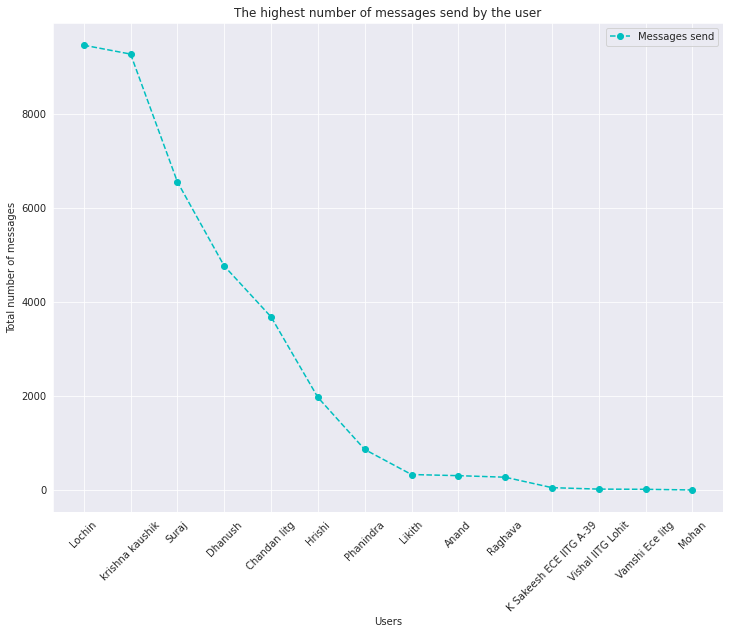

In [ ]:
#  Using seaborn for Styles 
sns.set_style("darkgrid")

# Resize the  figure size
plt.figure(figsize=(12, 9))

# Here we are ploting the line chart using plt.plot 
plt.plot(whatsapp_df1.user, whatsapp_df1.Number_of_messages, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("The highest number of messages send by the user")
plt.legend(['Messages send']);
plt.xticks(rotation=45)

In the previous plot we are using **matplotlib**. Now let use seaborn(sns) to beautify our chart and this time we will use bar chart as our data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



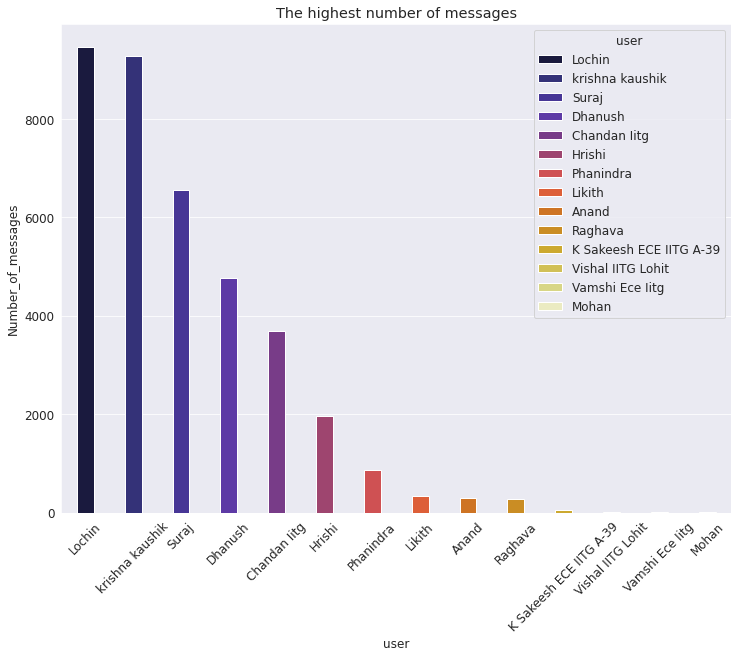

In [ ]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(whatsapp_df1.user,whatsapp_df1.Number_of_messages,hue='user',data=whatsapp_df1,dodge=False,palette="CMRmap")

#The title of our charts
plt.title("The highest number of messages")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.xticks(rotation=45)
plt.show()


# 2.Which emojis use the most by which users?

Now we want to know which emoji is used widely by the user and from the analysis, we can do an assumption that user will most likely to use emoji again in the other chat.

First we need to count the number of emoji in the mmessage row by using the **UNICODE_EMOJI** to search the code for the emoji

In [ ]:
import emoji
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys()) 
emoji.UNICODE_EMOJI.keys()

dict_keys(['en', 'es', 'pt', 'it'])

In [ ]:
emojis_list = map(lambda x: ''.join(x.split()),list(emoji.UNICODE_EMOJI['es'].keys())+list(emoji.UNICODE_EMOJI['en'].keys()) +
                  list(emoji.UNICODE_EMOJI['pt'].keys())+list(emoji.UNICODE_EMOJI['it'].keys()))

r = re.compile('|'.join(re.escape(p) for p in emojis_list))
r

re.compile(r'😀|😃|😄|😁|😆|😅|🤣|😂|🙂|🙃|😉|😊|😇|🥰|😍|🤩|😘|😗|☺️|😚|😙|\U0001f972|😋|😛|😜|🤪|😝|🤑|🤗|🤭|🤫|🤔|🤐|🤨|😐|😑|😶|😏|😒|🙄|😬|🤥|😌|😔|😪|🤤|😴|😷|🤒|🤕|🤢|🤮|🤧|🥵|🥶|🥴|😵|🤯|🤠|🥳|\U0001f978|😎|🤓|🧐|😕|😟|🙁|☹️|😮|😯|😲|😳|🥺|😦|😧|😨|😰|😥|😢|😭|😱|😖|😣|😞|😓|😩|😫|\U0001f971|😤|😡|😠|🤬|😈|👿|💀|☠️|💩|🤡|👹|👺|👻|👽|👾|🤖|😺|😸|😹|😻|😼|😽|🙀|😿|😾|🙈|🙉|🙊|💋|💌|💘|💝|💖|💗|💓|💞|💕|💟|❣️|💔|❤️|🧡|💛|💚|💙|💜|\U0001f90e|🖤|\U0001f90d|💯|💢|💥|💫|💦|💨|🕳️|💣|💬|👁️\u200d🗨️|🗨️|🗯️|💭|💤|👋|👋🏻|👋🏼|👋🏽|👋🏾|👋🏿|🤚|🤚🏻|🤚🏼|🤚🏽|🤚🏾|🤚🏿|🖐️|🖐🏻|🖐🏼|🖐🏽|🖐🏾|🖐🏿|✋|✋🏻|✋🏼|✋🏽|✋🏾|✋🏿|🖖|🖖🏻|🖖🏼|🖖🏽|🖖🏾|🖖🏿|👌|👌🏻|👌🏼|👌🏽|👌🏾|👌🏿|\U0001f90c|\U0001f90c🏻|\U0001f90c🏼|\U0001f90c🏽|\U0001f90c🏾|\U0001f90c🏿|\U0001f90f|\U0001f90f🏻|\U0001f90f🏼|\U0001f90f🏽|\U0001f90f🏾|\U0001f90f🏿|✌|✌️|✌🏻|✌🏼|✌🏽|✌🏾|✌🏿|🤞|🤞🏻|🤞🏼|🤞🏽|🤞🏾|🤞🏿|🤟|🤟🏻|🤟🏼|🤟🏽|🤟🏾|🤟🏿|🤘|🤘🏻|🤘🏼|🤘🏽|🤘🏾|🤘🏿|🤙|🤙🏻|🤙🏼|🤙🏽|🤙🏾|🤙🏿|👈|👈🏻|👈🏼|👈🏽|👈🏾|👈🏿|👉|👉🏻|👉🏼|👉🏽|👉🏾|👉🏿|👆|👆🏻|👆🏼|👆🏽|👆🏾|👆🏿|🖕|🖕🏻|🖕🏼|🖕🏽|🖕🏾|🖕🏿|👇|👇🏻|👇🏼|👇🏽|👇🏾|👇🏿|☝|☝️|☝🏻|☝🏼|☝🏽|☝🏾|☝🏿|👍|👍🏻|👍🏼|👍🏽|👍🏾|👍🏿|👎|👎🏻|👎🏼|👎🏽|👎🏾|👎🏿|✊|✊🏻|✊🏼|✊🏽|✊🏾|✊🏿|👊|👊🏻|👊🏼|👊🏽|👊🏾|👊🏿|🤛|🤛🏻|🤛🏼|🤛🏽|🤛🏾|🤛🏿|🤜|🤜🏻|🤜🏼|🤜🏽|🤜🏾|🤜🏿|👏|👏🏻|👏🏼|👏🏽|👏🏾|👏🏿|🙌|🙌🏻|🙌🏼|🙌🏽|🙌🏾|🙌🏿|👐|👐🏻|👐🏼|👐🏽|👐🏾|👐🏿|🤲|🤲🏻|🤲🏼|🤲🏽|🤲🏾|🤲🏿|🤝|🙏|🙏🏻|🙏🏼|🙏🏽|🙏🏾

In [ ]:
#Copy a dataset
whatsapp_df2 = whatsapp_df.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()),list(emoji.UNICODE_EMOJI['es'].keys())+list(emoji.UNICODE_EMOJI['en'].keys()) +
                  list(emoji.UNICODE_EMOJI['pt'].keys())+list(emoji.UNICODE_EMOJI['it'].keys())) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["message"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1
    
    
   

As you can see when already rendered the emoji from the **whatsapp_df2** and also successfully put in the dataframe table.Now all we need to do is just put in the Pie chart as our data visualization.

In [ ]:
#Copy a dataset
whatsapp_df2 = whatsapp_df.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()),list(emoji.UNICODE_EMOJI['en'].keys())) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["message"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [ ]:
del emoji_ctr['\U0001f971']
del emoji_ctr['\U0001f972']
del emoji_ctr['\U0001f9a5']
del emoji_ctr['\U0001f9a7']

In [ ]:
emoji_ctr

Counter({'☔': 1,
         '☠️': 2,
         '☹️': 77,
         '♥️': 1,
         '✋': 4,
         '❕': 2,
         '❤️': 99,
         '➖': 8,
         '🃏': 1,
         '🌂': 4,
         '🌚': 9,
         '🌛': 1,
         '🌜': 3,
         '🌝': 24,
         '🌶️': 1,
         '🍃': 1,
         '🍑': 1,
         '🍫': 4,
         '🍰': 3,
         '🍺': 2,
         '🍻': 2,
         '🎂': 14,
         '🎄': 1,
         '🎉': 59,
         '🎊': 2,
         '🏟️': 1,
         '🏳️': 1,
         '🐍': 88,
         '🐐': 6,
         '🐷': 1,
         '👁️': 4,
         '👃': 2,
         '👄': 1,
         '👅': 1,
         '👉': 1,
         '👊': 2,
         '👋': 2,
         '👌': 38,
         '👍': 95,
         '👎': 1,
         '👏': 24,
         '👑': 1,
         '👖': 1,
         '👟': 2,
         '👻': 1,
         '💀': 3,
         '💁': 1,
         '💃': 1,
         '💔': 4,
         '💗': 1,
         '💙': 4,
         '💣': 1,
         '💥': 2,
         '💪': 14,
         '💯': 22,
         '🔥': 1036,
         '🕺': 15,
        

In [ ]:
#This will help to create or rendered the emoji 
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] = [''] * 10
emojis_df['number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_ctr.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

print(emojis_df)

  emoji  number_of_Emoji
0     😂             2031
1     🔥             1036
2     😭              553
3     🤦              439
4     😅              329
5     😶              227
6     🙄              197
7     😑              158
8     🤯              150
9     🥳              125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Before we go into each of the users to determine which emoji is widely used by the user. We need to look at the overall emoji that have been used from all of the users. As you can see on the results, the most widely use emoji among the three users is Face with **Tears of Joy** that stand around **38.7%** from the overall. So we can agree that most of the time the user will use Face with **Tears of Joy Emoji** in this group chat

**Bouns tips**

We will use plotly to create our pie-charts for Emojis
Learn more: https://plotly.com/python/pie-charts/

In [ ]:
#This pei chart give us and ideas the overall view of which emoji use the most
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

After knowing the **Tears of Joy Emoji** is the most widely use in the group chat. Now we want to understand each of the user use what emoji the most.

This time we will not create a **emoji_df** because we want to use the user row and emoji row. So we are able to know each of the users use what emoji

In [ ]:
 whatsapp_df2.shape

(37614, 3)

In [ ]:
emojis_df = whatsapp_df2

## In here we are able to see each of the users use what emoji the most



In [ ]:
import plotly

In [ ]:
l = emojis_df.user.unique()
for i in range(len(l)):
    dummy_df = emojis_df[emojis_df['user'] == l[i]]
    emoji_x = Counter()
    emojis_list = map(lambda x: ''.join(x.split()),list(emoji_ctr.keys())) #UNICODE_EMOJI class have a thee emoji code inside
    r = re.compile('|'.join(re.escape(p) for p in emojis_list))
    for idx, row in dummy_df.iterrows():
      emojis_found = r.findall(row["message"]) #The findall() is a functions for regex that help to find a matches 
      for emoji_found in emojis_found:
        emoji_x[emoji_found] += 1
    emoji_dict = sorted(emoji_x.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', l[i])
    user_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(user_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    plotly.offline.plot(fig, filename="user_" + str(l[i]) + ".html")
    fig.show()

Emoji Distribution for krishna kaushik


Emoji Distribution for Suraj


Emoji Distribution for Lochin


Emoji Distribution for Chandan Iitg


Emoji Distribution for Dhanush


Emoji Distribution for Hrishi


Emoji Distribution for Phanindra


Emoji Distribution for Raghava


Emoji Distribution for Anand


Emoji Distribution for K Sakeesh ECE IITG A-39


Emoji Distribution for Likith


Emoji Distribution for Vishal IITG Lohit


Emoji Distribution for Vamshi Ece Iitg


Emoji Distribution for Mohan


# 3. Most active hour in whatsapps

In this analysis, it helps us to understand what is the hours where all the member is very active in WhatsApp. We will depend on two variable on is the number of messages and the hours. Then we will able to know when is the most active hours

In [29]:
#Copy a dataframe
whatsapp_df3 = whatsapp_df.copy()

whatsapp_df3['number_of_message'] = [1] * whatsapp_df3.shape[0]

whatsapp_df3['hours'] = whatsapp_df3['datetime'].apply(lambda x: x.hour)

time_df = whatsapp_df3.groupby('hours').count().reset_index().sort_values(by = 'hours')


time_df
print(time_df)




    hours  datetime  user  message  number_of_message
0       0      1407  1407     1407               1407
1       1       276   276      276                276
2       2        54    54       54                 54
3       3        93    93       93                 93
4       4         5     5        5                  5
5       5         9     9        9                  9
6       6        27    27       27                 27
7       7        81    81       81                 81
8       8       247   247      247                247
9       9      1000  1000     1000               1000
10     10      1327  1327     1327               1327
11     11      2125  2125     2125               2125
12     12      2363  2363     2363               2363
13     13      2102  2102     2102               2102
14     14      1945  1945     1945               1945
15     15      1883  1883     1883               1883
16     16      2198  2198     2198               2198
17     17      2822  2822   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



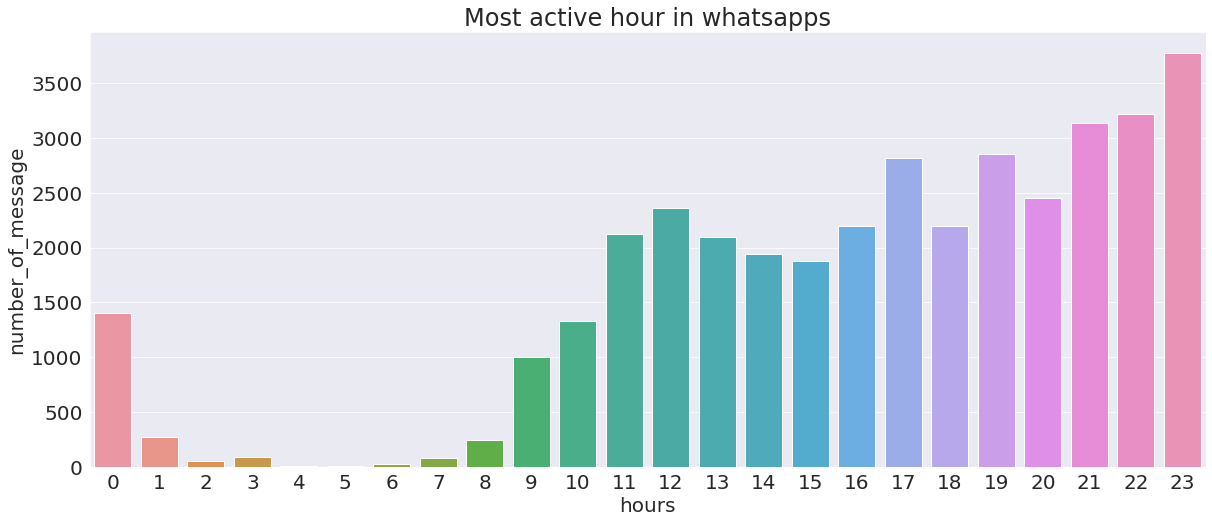

In [32]:
#Create the formatting of the graph 
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)


# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
sns.barplot(time_df.hours,time_df.number_of_message,data = time_df,dodge=False)






# 4. Which month have the highest messages and also the busiest month?


Here we hope to found out the month that we are busiest and we look in the amount of message is generated.

In [35]:
whatsapp_df4 = whatsapp_df.copy()
whatsapp_df4['Number_of_messages'] = [1] * whatsapp_df4.shape[0]

whatsapp_df4['month'] = whatsapp_df4['datetime'].apply(lambda x: x.month)  

df_month = whatsapp_df4.groupby('month')['Number_of_messages'].count().sort_values(ascending = False).reset_index()
print(df_month)


    month  Number_of_messages
0       9                7972
1       7                7257
2       8                5113
3       6                5042
4      10                4004
5       5                1747
6       2                1364
7       4                1304
8      11                1193
9       1                 902
10      3                 871
11     12                 845


Text(0.5, 1.0, 'Month that have the highest messages and the busiest month?')

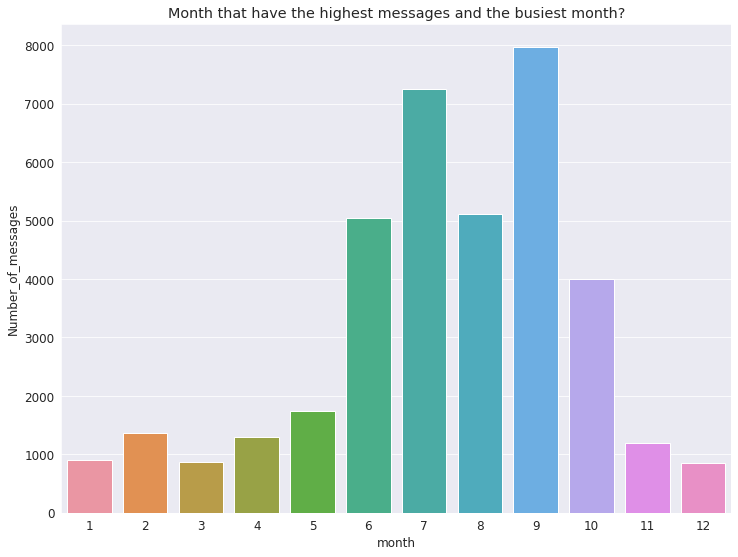

In [38]:
#Formating
sns.set_style("darkgrid")
  
from pandas.compat._optional import import_optional_dependency

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Number_of_messages,data=df_month,dodge=False,)
plt.title("Month that have the highest messages and the busiest month?")

# 5.Determine which word or text did the user use the most?

In here we are going to use a word cloud to visual representation of word in the chat and determine which word is widely use by the user? The reason behide this  analysis is to understand the user behaviors. Why do we say so? Because if the word is repeating use we can say that the user will more likely to use the particular or text again in the other chat.

In [39]:
whatsapp_df5 = whatsapp_df.copy()


In [55]:
!pip install -U spacy

     |████████████████████████████████| 6.4MB 4.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 10.1MB 30.5MB/s 
     |████████████████████████████████| 460kB 43.8MB/s 
     |████████████████████████████████| 624kB 52.7MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [57]:
!python -m spacy download en_core_web_sm

2021-07-13 06:36:12.471290: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.6MB 218kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [68]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words
all_stopwords.add("u")
all_stopwords.add("https")
all_stopwords.add('?')
all_stopwords.add(',')
all_stopwords.add('...')
all_stopwords.add('I')
all_stopwords.add(':')
all_stopwords.add('@')
all_stopwords.add('!')
all_stopwords.add('.')


In [69]:
from nltk.tokenize import word_tokenize

In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
text= " ".join(review for review in whatsapp_df5.message)
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
def word_count(str):
    counts = dict()


    for word in str:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [72]:
ct=word_count(tokens_without_sw)

In [73]:
dict(sorted(ct.items(), key=lambda item: -item[1]))

{'lol': 974,
 'lo': 965,
 'ra': 794,
 'xD': 658,
 'kada': 633,
 '😂': 621,
 'ki': 560,
 'like': 558,
 'yeah': 463,
 'think': 456,
 'good': 450,
 'kuda': 448,
 '2': 421,
 'anta': 396,
 'time': 352,
 'ani': 327,
 '3': 321,
 'ga': 316,
 'know': 313,
 'r': 311,
 'No': 297,
 'nan': 297,
 '😂😂': 296,
 'Lol': 289,
 'year': 287,
 'match': 284,
 'damn': 275,
 'This': 274,
 'got': 274,
 'em': 265,
 'message': 262,
 'nice': 261,
 '1': 257,
 'team': 257,
 'deleted': 252,
 '``': 249,
 'oh': 249,
 'city': 240,
 'e': 239,
 'better': 231,
 'dont': 223,
 'right': 215,
 'ur': 210,
 'undi': 209,
 'Ha': 202,
 'U': 202,
 '4': 199,
 '916303364300': 198,
 'Yes': 196,
 'test': 196,
 'ante': 194,
 'yes': 193,
 '(': 193,
 ')': 191,
 'Haa': 191,
 'srh': 186,
 'rcb': 186,
 'It': 182,
 'Oh': 180,
 'na': 178,
 'anukunta': 178,
 'thing': 177,
 'people': 176,
 '>': 175,
 'best': 174,
 '5': 172,
 'inka': 171,
 'wtf': 170,
 'ig': 170,
 'guys': 167,
 'want': 166,
 'ok': 165,
 '916900400923': 164,
 'start': 163,
 'shd': 16

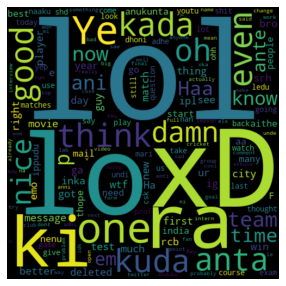

In [54]:
#Each of the word in the message will be review
word = " ".join(review for review in whatsapp_df5.message)
stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya","u","https"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




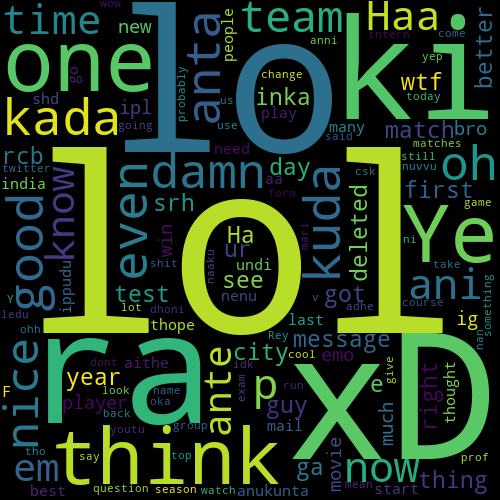

In [50]:
wordcloud.to_image()

In [52]:
 dict(sorted(ct.items(), key=lambda item: -item[1]))

{'is': 2675,
 'the': 2337,
 'to': 2079,
 'and': 1816,
 'in': 1793,
 'I': 1536,
 ',': 1484,
 'of': 1484,
 'a': 1364,
 'for': 1343,
 'i': 1340,
 'it': 1327,
 'that': 1322,
 'this': 1233,
 'u': 1102,
 'not': 1040,
 'was': 1034,
 'lol': 950,
 'lo': 927,
 'they': 747,
 'no': 715,
 'he': 714,
 'ra': 713,
 'but': 706,
 'on': 639,
 'xD': 639,
 'only': 631,
 '😂': 611,
 'be': 605,
 'are': 596,
 'or': 586,
 'have': 567,
 'kada': 554,
 'like': 549,
 'ki': 545,
 'will': 514,
 'if': 514,
 'so': 495,
 '?': 491,
 'we': 453,
 'think': 451,
 'one': 451,
 'at': 443,
 'yeah': 443,
 'you': 442,
 'kuda': 442,
 'all': 436,
 'with': 433,
 'good': 430,
 'did': 427,
 'also': 414,
 'what': 410,
 'too': 403,
 'even': 402,
 '2': 393,
 'do': 377,
 'from': 370,
 'anta': 369,
 'more': 355,
 'can': 354,
 'there': 354,
 'than': 345,
 "it's": 334,
 'just': 334,
 'time': 329,
 'ani': 318,
 'me': 311,
 'r': 309,
 'get': 307,
 'know': 305,
 '3': 303,
 'ga': 302,
 "don't": 301,
 'nan': 297,
 'as': 295,
 '😂😂': 292,
 'Lol': 2

In [ ]:
jovian.commit(project=project_name,enviroment=None,files=["Chat.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "edsenmichaelcy/whatsapp-chat-analysis-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/edsenmichaelcy/whatsapp-chat-analysis-course-project


'https://jovian.ml/edsenmichaelcy/whatsapp-chat-analysis-course-project'

# Conclusion

**Data Retrieval** 

First we learn how to load data at whatsapp and understand the format as text file.Other than that we understand what kind format should we extract(eg "media" or "without media")
  

**Data Preparation and Cleaning**

In the data preparation and cleaning we learn on how to convert text file into dataframe by using txtTodf() functions.
Then we learn to add name to the colums and even on how to clean image file from the dataframe

**Business & Data understanding**

Then we start understand the business needed and the data in the dataframe. In the business understand how us to understand what question should we need to ask that will lead to business succeed.

**Exploratory Data Analysis(EDA)**

In the EDA we look at five important question to ask: 
1. Which users have the most Chat/messages in the group?
2. Which emojis use the most by which users?
3. Most active hours?
4. Which month have the highest messages and also the busiest month?
5. Determine which word or text did the user use the most?

I really hope you are enjoying reading my notebook as well my medium post . Hope you like it and maybe you can try out your own data analysis too!!.



Thank you,
**Krishna Kaushik**

# Reference
https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

https://seaborn.pydata.org/examples/part_whole_bars.html

https://wellsr.com/python/seaborn-barplot-tutorial-for-python/#:~:text=If%20you%20want%20to%20display,have%20to%20do%20work%20around.&text=You%20can%20see%20that%20the,be%20stored%20in%20a%20variable.

http://seaborn.pydata.org/tutorial/color_palettes.html

https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

https://plotly.com/python/pie-charts/

https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a

https://medium.com/@edsenmichaelcy/whatsapp-message-exploratory-data-analysis-eda-538560ee1c99